In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import imdb

In [42]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(
num_words=10000)

In [43]:
X_train[:10]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [69]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [44]:
print("train_data ", X_train.shape)
print("train_labels ", y_train.shape)

print("test_data ", X_test.shape)
print("test_labels ", y_test.shape)

print("Max val word index ")
print(max([max(sequence) for sequence in X_train]))
print("Max length num words of review in train ")
print(max([len(sequence) for sequence in X_train]))

train_data  (25000,)
train_labels  (25000,)
test_data  (25000,)
test_labels  (25000,)
Max val word index 
9999
Max length num words of review in train 
2494


In [15]:
w_index = imdb.get_word_index()

r_w_index = dict([(value, key) for (key, value) in w_index.items()])

decoded_review = ' '.join([r_w_index.get(i - 3, '?') for i in X_train[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [70]:
w_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [45]:
def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1.
    return results

In [46]:
nX_train = vectorize_seq(X_train)
nX_test = vectorize_seq(X_test)

print("nX_train ", nX_train.shape)
print("nX_test ", nX_test.shape)

nX_train  (25000, 10000)
nX_test  (25000, 10000)


In [67]:
nX_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [48]:
ny_train = np.asarray(y_train).astype('float32')
ny_test = np.asarray(y_test).astype('float32')

print("ny_train ", ny_train.shape)
print("ny_test ", ny_test.shape)

ny_train  (25000,)
ny_test  (25000,)


In [68]:
ny_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [49]:
x_val = nX_train[:10000]
partial_x_train = nX_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [51]:
model = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(nX_test, ny_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 2s 48ms/step - loss: 0.5186 - acc: 0.7661 - val_loss: 0.3988 - val_acc: 0.8499
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.3150 - acc: 0.8907 - val_loss: 0.3104 - val_acc: 0.8808
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 0.2357 - acc: 0.9179 - val_loss: 0.3112 - val_acc: 0.8753
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1907 - acc: 0.9343 - val_loss: 0.2834 - val_acc: 0.8855
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.1561 - acc: 0.9479 - val_loss: 0.2913 - val_acc: 0.8823
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1274 - acc: 0.9573 - val_loss: 0.3079 - val_acc: 0.8819
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.1077 - acc: 0.9649 - val_loss: 0.3190 - val_acc: 0.8835
Epoch 8/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0870 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

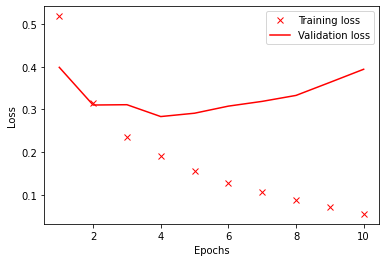

In [64]:
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'rx', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

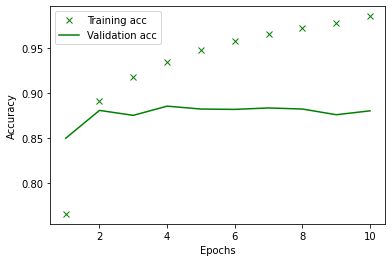

In [65]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'gx', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
model.predict(nX_test)

782/782 [==============================] - 2s 2ms/step


array([[0.07770868],
       [0.99999267],
       [0.99943703],
       ...,
       [0.0337498 ],
       [0.04943436],
       [0.88259685]], dtype=float32)